# Total Segmentator Data Analysis

In [1]:
# check which packages are installed in this environment
!pip list

Package                       Version
----------------------------- --------------
ace_tools                     0.0
acvl_utils                    0.2
aiohappyeyeballs              2.4.3
aiohttp                       3.10.8
aiosignal                     1.3.1
anyio                         4.6.0
appnope                       0.1.4
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
asttokens                     2.4.1
async-lru                     2.0.4
attrs                         24.2.0
babel                         2.16.0
batchgenerators               0.25.1
batchgeneratorsv2             0.2.1
beautifulsoup4                4.12.3
biomedisa                     24.8.3
bleach                        6.1.0
bokeh                         3.6.0
certifi                       2024.8.30
cffi                          1.17.1
charset-normalizer            2.0.12
comm                          0.2.2
connected-components-3d       3.19.0
contou

In [1]:
from util import *

from IPython.display import display, Image

In [2]:
CT_SCAN_PATH = '/Volumes/Untitled/Totalsegmentator_dataset_v201/s0001/ct.nii.gz'
CT_SCAN_SEGMENTATION_PATH = '/Volumes/Untitled/Totalsegmentator_dataset_v201/s0001/segmentations/colon.nii.gz'

In [ ]:
visualize_ct_scan(CT_SCAN_PATH, figsize=(10, 3))

In [5]:
visualize_ct_scan(CT_SCAN_SEGMENTATION_PATH,figsize=(15, 3))

In [6]:
ct_scan_gif = generate_gif( CT_SCAN_PATH )
ct_scan_segm_gif = generate_gif( CT_SCAN_SEGMENTATION_PATH )

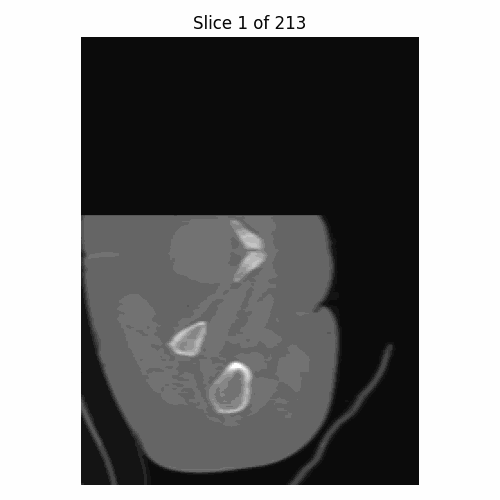

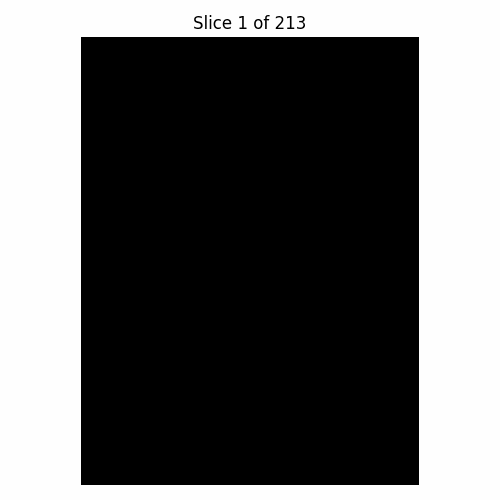

In [9]:
WIDTH = 300
HEIGHT = 300

[display(Image(filename=ct_scan_gif, width=WIDTH, height=HEIGHT)),
display(Image(filename=ct_scan_segm_gif, width=WIDTH, height=HEIGHT))];


In [8]:
import nibabel as nib

def open_ct_scan(file_path):
    """
    Opens a CT scan file and returns the image data and header information.

    Parameters:
    - file_path (str): The path to the CT scan file.

    Returns:
    - image_data (numpy.ndarray): The image data from the CT scan.
    - header (nibabel.Nifti1Header): The header information of the CT scan.
    """
    # Load the CT scan file
    ct_scan = nib.load(file_path)
    
    # Get the image data
    image_data = ct_scan.get_fdata()
    
    # Get the header information
    header = ct_scan.header
    
    return image_data, header

# Example usage
ct_image_data, ct_header = open_ct_scan(CT_SCAN_PATH)

In [7]:

mesh = generate_3d_reconstruction(CT_SCAN_SEGMENTATION_PATH)

display(HTML(visualize_mesh(mesh, CT_SCAN_SEGMENTATION_PATH, opacity=1)))


## Things to Try

Given the low quality of the scans, we can try to generate 3D synthetic CT scans of the colon?

- MedSegDiff: https://github.com/MedicineToken/MedSegDiff
- MASI: https://arxiv.org/pdf/2409.11169
- 